# Analysis of sale data of an E-commerse store

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Data reading and data view

In [2]:
df = pd.read_csv('Ecommerce Customers Sale')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


Checking for missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


Exploratory data analysis

In [4]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [5]:
X = df[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = df['Yearly Amount Spent']

C:\Users\HP\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x400 with 0 Axes>

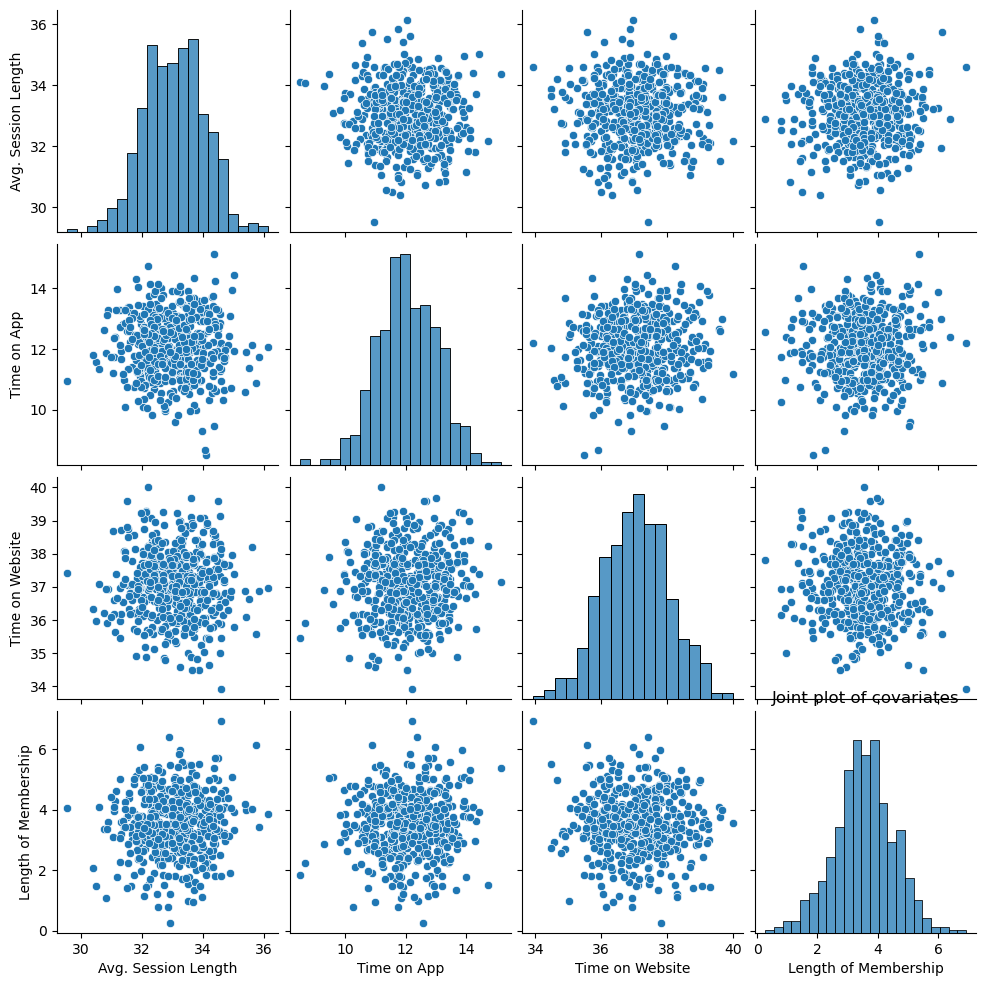

In [6]:
plt.figure(figsize=(6,4))
sns.pairplot(X)
plt.title("Joint plot of covariates")
plt.show()

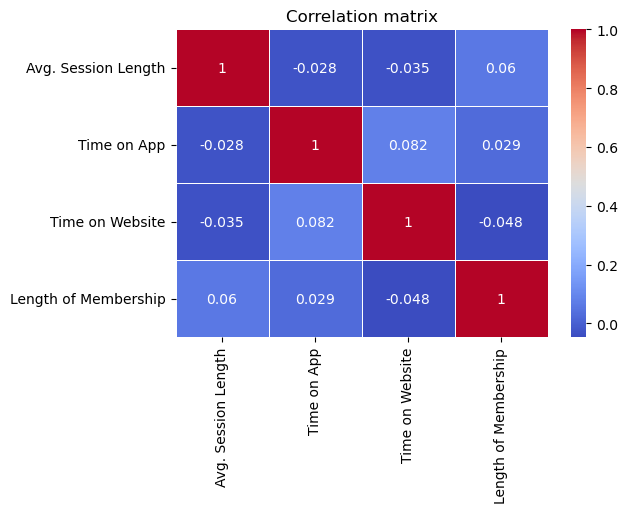

In [7]:
plt.figure(figsize=(6,4))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

Fitting of Linear regression

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [10]:
print("Intercept: ", lm.intercept_)
pd.DataFrame(lm.coef_, X.columns, columns=['coefficients'])

Intercept:  -1044.2574146365578


,coefficients
Avg. Session Length,25.596259
Time on App,38.785346
Time on Website,0.310386
Length of Membership,61.896829


In [11]:
yp_train = lm.predict(X_train)
yp_test = lm.predict(X_test)

Train Results

In [12]:
print("Train data MSE: ", mean_squared_error(yp_train, y_train))
print("Train data R2: ", r2_score(yp_train, y_train))

Train data MSE:  95.82253022867226
Train data R2:  0.9852084624501299


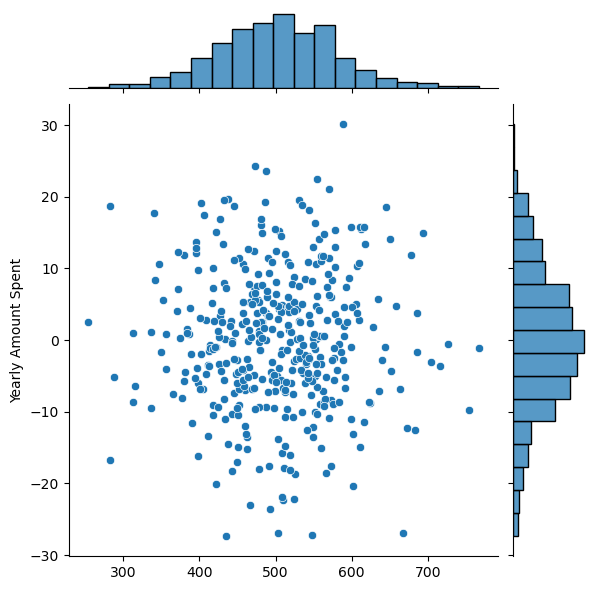

In [13]:
res_train = y_train - yp_train
sns.jointplot(x=yp_train, y=res_train, kind='scatter')
plt.show()

Test results

In [14]:
print("Test data MSE: ", mean_squared_error(yp_test, y_test))
print("Test data R2: ", r2_score(yp_test, y_test))

Test data MSE:  109.86374118393991
Test data R2:  0.9782625350414405


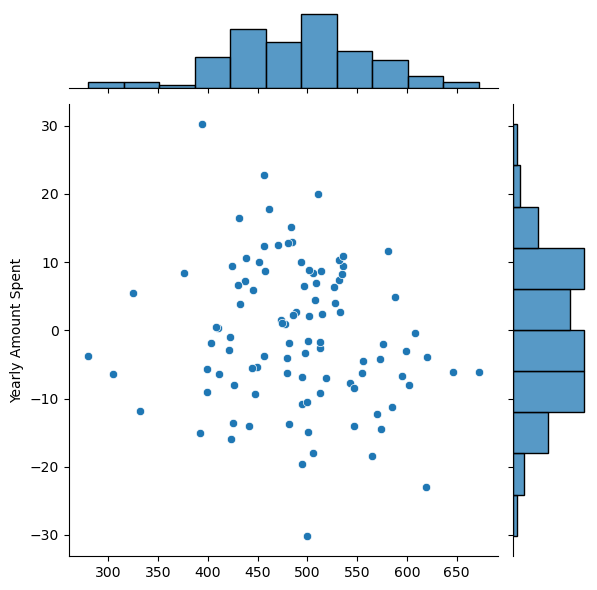

In [15]:
res_test = y_test - yp_test
sns.jointplot(x=yp_test, y=res_test, kind='scatter')
plt.show()